In [1]:
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn import preprocessing

from sklearn.model_selection import train_test_split 

In [2]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
ca1 = pd.read_csv("aps_failure_set.csv")

In [4]:
miss_vals = ["na"]

In [5]:
ca1 = pd.read_csv("aps_failure_set.csv", na_values = miss_vals)

In [6]:
ca1['class'].replace('neg', 0, inplace = True)
ca1['class'].replace('pos', 1, inplace = True)

In [7]:
isnull = ca1.isnull().sum()

nperc = (isnull / (len(ca1))) * 100

more_than_50 = nperc[nperc > 50]

print(more_than_50)

ab_000    77.215000
bm_000    65.915000
bn_000    73.348333
bo_000    77.221667
bp_000    79.566667
bq_000    81.203333
br_000    82.106667
cr_000    77.215000
dtype: float64


In [8]:
ca1_d = ca1.drop(["ab_000", "bm_000", "bn_000", "bo_000", "bp_000", "bq_000", "br_000",
                        "cr_000"], axis = 1)

ca1_d.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [9]:
ca1_split = ca1_d.drop(["class"], axis = 1)

ca1_split.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [10]:
class_ca1 = ca1_d[["class"]]

class_ca1.head()

,class
0,0
1,0
2,0
3,0
4,0


In [11]:
X = ca1_split

y = class_ca1

In [12]:
X.fillna(X.median(), inplace = True)

In [13]:
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

In [14]:
pca = PCA()

pca.fit(X_scaled)

PCA()

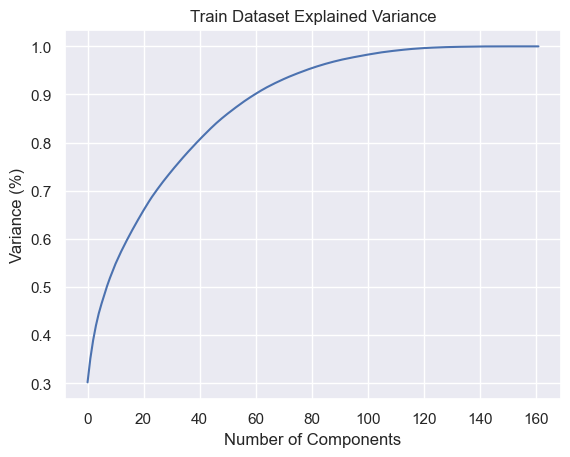

In [15]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Variance (%)")
plt.title("Train Dataset Explained Variance")
plt.show()

In [16]:
pca = PCA(n_components = 100)

ca1_pca = pca.fit_transform(X_scaled)

In [17]:
ca1_pca = pd.DataFrame(ca1_pca)

ca1_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2.370109,-1.173316,1.899632,-0.060218,0.750227,-0.398509,0.005011,-0.348752,-1.358148,-0.942015,...,0.084890,-0.323565,-0.342278,0.148002,-0.152373,0.366161,0.038600,-0.087274,0.094097,0.611890
1,-0.620366,-0.552837,0.069060,-0.117031,0.053238,-0.171584,-0.008234,0.182780,0.313255,-0.174585,...,-0.281379,0.188383,0.211624,0.091409,0.408717,0.368515,0.013236,-0.291912,-0.989073,0.005208
2,-1.211995,-0.110978,-0.237763,-0.146611,0.243909,0.071734,-0.014483,-0.155625,0.054439,0.481591,...,0.046055,0.007005,-0.043509,-0.063723,-0.031603,-0.026151,0.084607,-0.045258,0.009034,0.025724
3,-3.194907,0.224803,-0.761693,0.264186,-0.154487,0.237237,-0.023598,0.563016,0.939585,0.851131,...,-0.011963,-0.018513,0.033087,0.035983,-0.033603,-0.035984,-0.011220,0.012446,0.010927,-0.020712
4,0.317832,-0.099276,0.843198,-0.577345,0.214998,-0.070132,0.011109,-0.519218,-1.079808,-0.785517,...,-0.009788,0.019045,-0.107842,-0.091322,0.203271,0.127000,0.279093,0.042210,-0.085615,-0.185164


In [18]:
ca1_concat = pd.concat([ca1_pca, y[["class"]]], axis = 1)

ca1_concat.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,class
0,2.370109,-1.173316,1.899632,-0.060218,0.750227,-0.398509,0.005011,-0.348752,-1.358148,-0.942015,...,-0.323565,-0.342278,0.148002,-0.152373,0.366161,0.038600,-0.087274,0.094097,0.611890,0
1,-0.620366,-0.552837,0.069060,-0.117031,0.053238,-0.171584,-0.008234,0.182780,0.313255,-0.174585,...,0.188383,0.211624,0.091409,0.408717,0.368515,0.013236,-0.291912,-0.989073,0.005208,0
2,-1.211995,-0.110978,-0.237763,-0.146611,0.243909,0.071734,-0.014483,-0.155625,0.054439,0.481591,...,0.007005,-0.043509,-0.063723,-0.031603,-0.026151,0.084607,-0.045258,0.009034,0.025724,0
3,-3.194907,0.224803,-0.761693,0.264186,-0.154487,0.237237,-0.023598,0.563016,0.939585,0.851131,...,-0.018513,0.033087,0.035983,-0.033603,-0.035984,-0.011220,0.012446,0.010927,-0.020712,0
4,0.317832,-0.099276,0.843198,-0.577345,0.214998,-0.070132,0.011109,-0.519218,-1.079808,-0.785517,...,0.019045,-0.107842,-0.091322,0.203271,0.127000,0.279093,0.042210,-0.085615,-0.185164,0


In [19]:
ca1_array = ca1_concat.values

In [20]:
X = ca1_array[:,0:100]

y = ca1_array[:,100]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [22]:
from sklearn import metrics

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

In [23]:
from sklearn import svm

In [27]:
cls_svm = svm.SVC(kernel = "linear") 

cls_svm.fit(X_train, y_train)

y_pred_svm = cls_svm.predict(X_test)

In [28]:
print("accuracy:", metrics.accuracy_score(y_test, y_pred_svm))

print( "accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred_svm)) )

accuracy: 0.9910833333333333
accuracy: 0.99


In [29]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     11786
         1.0       0.87      0.59      0.70       214

    accuracy                           0.99     12000
   macro avg       0.93      0.79      0.85     12000
weighted avg       0.99      0.99      0.99     12000



In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
kNN = KNeighborsClassifier(n_neighbors = 9)

kNN.fit(X_train, y_train)

y_pred_knn = kNN.predict(X_test)

In [32]:
print("accuracy:", metrics.accuracy_score(y_test, y_pred_knn))

print( "accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred_knn)) )

accuracy: 0.9883333333333333
accuracy: 0.99


In [33]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     11786
         1.0       0.81      0.45      0.58       214

    accuracy                           0.99     12000
   macro avg       0.90      0.72      0.79     12000
weighted avg       0.99      0.99      0.99     12000



In [34]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [35]:
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 0)

clf = clf.fit(X_train, y_train)

y_pred_dt = clf.predict(X_test)

In [36]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))

print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred_dt)) )

Accuracy: 0.98675
Accuracy: 0.99


In [37]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     11786
         1.0       0.63      0.61      0.62       214

    accuracy                           0.99     12000
   macro avg       0.81      0.80      0.81     12000
weighted avg       0.99      0.99      0.99     12000



In [38]:
from sklearn.linear_model import LinearRegression

In [39]:

def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv = 10,
                             scoring = 'r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')
    
    
    

In [40]:
lr = LinearRegression().fit(X_train, y_train)

In [41]:
get_cv_scores(lr)

CV Mean:  -45744.54354843812
STD:  137227.20089284028




In [42]:
y_pred_lr = lr.predict(X_test)

In [43]:
linear = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
linear.head()

,Actual,Predicted
0,0.0,0.002932
1,0.0,-0.004400
2,0.0,-0.004213
3,0.0,-0.004466
4,0.0,-0.003121


In [44]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.008916666666666666
Mean Squared Error: 0.008916666666666666
Root Mean Squared Error: 0.0944281031614353


In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
nvclassifier = GaussianNB()

nvclassifier.fit(X_train, y_train)

GaussianNB()

In [47]:
y_pred_gnb = nvclassifier.predict(X_test)

print(y_pred_gnb)

[0. 0. 0. ... 0. 0. 0.]


In [48]:
y_compare = np.vstack((y_test,y_pred_gnb)).T

y_compare[:30,:]

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [49]:
score = accuracy_score(y_test, y_pred_gnb)
print(score)

0.9653333333333334


In [50]:
nvclassifier = GaussianNB()

cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 10).mean()

0.9650333333333332

In [52]:
print("Accuracy SVM:", metrics.accuracy_score(y_test, y_pred_svm))

print("Accuracy KNN:", metrics.accuracy_score(y_test, y_pred_knn))

print("Accuracy DT:",metrics.accuracy_score(y_test, y_pred_dt))

print("Accuracy GNB:", cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 10).mean())

Accuracy SVM: 0.9910833333333333
Accuracy KNN: 0.9883333333333333
Accuracy DT: 0.98675
Accuracy GNB: 0.9650333333333332
